In [28]:
# Dependencies
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Create and store file paths to all data sets

# UN World Happiness Report Data from Kaggle as: https://www.kaggle.com/alcidesoxa/world-happiness-report-2005-2018
world_happy_file = "Data/world-happiness-report-2005-2018 3.csv"

# Healthcare spending from World Bank as: https://data.worldbank.org/indicator/SH.XPD.CHEX.GD.ZS?name_desc=false
healthcare_spending_file = "Data/Health Expenditure.csv"

# Happiness vs Investment Data from Kaggle as: https://www.kaggle.com/andreyka2/happiness-and-investment
happyVSinvest_file = "Data/Inv_Hap.csv"

# Alcohol consumption from Kaggle as: https://www.kaggle.com/justmarkham/alcohol-consumption-by-country
alcohol_file = "Data/drinks.csv"

# Economic Freedom Data from Kaggle as: https://www.kaggle.com/gsutters/economic-freedom#efw_cc.csv
econ_free_file = "Data/efw_cc.csv"

# Military Expenditure Data from Kaggle as: https://www.kaggle.com/nitinsss/military-expenditure-of-countries-19602019
mil_spend_file = "Data/Military Expenditure.csv"

In [30]:
# Use Pandas to read data

# UN World Happiness Data
happiness_report = pd.read_csv(world_happy_file, delimiter=";")
# happiness_report_pd.head()            # view the data

# UN World Happiness Data
healthcare_spending = pd.read_csv(healthcare_spending_file, skiprows=4)
# healthcare_spending.head()            # view the data

# Happiness vs Investment by Country Data
happy_invest = pd.read_csv(happyVSinvest_file)
# happy_invest.head()            # view the data

# Alcohol Consumption by Country Data
alcohol = pd.read_csv(alcohol_file)
# alcohol.head()            # view the data

# Economic Freedom of the World Data
econ_free = pd.read_csv(econ_free_file)

# Military Expenditure by Country Data
mil_spend = pd.read_csv(mil_spend_file)

# mil_spend.head()            # view the data
econ_free.head()            # view the data


,year,ISO_code,countries,ECONOMIC FREEDOM,rank,quartile,1a_government_consumption,1b_transfers,1c_gov_enterprises,1d_top_marg_tax_rate,...,3_sound_money,4a_tariffs,4b_regulatory_trade_barriers,4c_black_market,4d_control_movement_capital_ppl,4_trade,5a_credit_market_reg,5b_labor_market_reg,5c_business_reg,5_regulation
0,2016,ALB,Albania,7.54,34.0,1.0,8.232353,7.509902,8.0,8.0,...,9.553657,8.963556,7.489905,10.00000,6.406138,8.214900,7.098562,6.916278,6.705863,6.906901
1,2016,DZA,Algeria,4.99,159.0,4.0,2.150000,7.817129,0.0,4.5,...,7.253894,6.872533,2.481294,5.56391,1.590362,4.127025,5.100509,5.029513,5.676956,5.268992
2,2016,AGO,Angola,5.17,155.0,4.0,7.600000,8.886739,0.0,9.5,...,5.606605,6.989244,2.024949,10.00000,2.044823,5.264754,7.064905,4.560325,4.930271,5.518500
3,2016,ARG,Argentina,4.84,160.0,4.0,5.335294,6.048930,6.0,4.0,...,5.614336,6.421600,4.811105,0.00000,4.697482,3.982547,5.419820,5.151405,5.535831,5.369019
4,2016,ARM,Armenia,7.57,29.0,1.0,7.264706,7.748532,8.0,5.0,...,9.521940,8.547556,7.194410,10.00000,6.830998,8.143241,9.102046,6.234630,6.797530,7.378069


In [31]:
# UN Happiness Report Data Frame
# Extract and arrange data table with 'Country Name' as lead column

#cols=["WVS round 1981-1984;Most people can be trusted"]
#happiness_report.drop(cols,axis=1,inplace=True)

happiness_report = happiness_report[["Country name","Year","Life Ladder","Log GDP per capita","Social support",
                                     "Healthy life expectancy at birth","Freedom to make life choices","Generosity",
                                     "Perceptions of corruption","Confidence in national government"]]
happiness_report = happiness_report.rename(columns={"Country name":"Country"})


happiness_report = happiness_report.loc[happiness_report["Year"]==2012]
print(happiness_report.shape)
happiness_report.head()

(142, 10)


,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.435440
15,Albania,2012,5.510124,9.246655,0.784502,66.959999,0.601512,-0.172262,0.847675,0.364894
24,Algeria,2012,5.604596,9.485086,0.839397,64.820000,0.586663,-0.195859,0.690116,NaN
30,Angola,2012,4.360250,8.699498,0.752593,53.200001,0.456029,-0.124065,0.906300,0.237091
39,Argentina,2012,6.468387,9.863960,0.901776,67.660004,0.747498,-0.143875,0.816546,0.418255


In [32]:
# Healthcare Spending Data Frame
# Extract and arrange data table with 'Country Name' as lead column

healthcare_spending = healthcare_spending[["Country Name","Country Code", "2012"]]
healthcare_spending = healthcare_spending.rename(columns={"Country Name": "Country","2012":"Healthcare Expenses(% of GDP)"})


 # Renaming Countries
healthcare_spending = healthcare_spending.replace(
    {"Congo, Dem. Rep.": "Congo (Kinshasa)", 
     "Congo, Rep.": "Congo (Brazzaville)", 
    "Dominica": "Dominican Republic",
    "Egypt, Arab Rep": "Egypt",
    "Guinea-Bissau":"Guinea",
    "Iran, Islamic Rep.": "Iran",
    "Korea, Rep.":"South Korea",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR":"Laos",
    "Russian Federation": "Russia",
    "Samoa": "Somaliland region",
    "Slovak Republic":"Slovakia",
    "Venezuela, RB": "Venezuela",
    "Yemen, Rep": "Yemen"})

print(healthcare_spending.shape)
healthcare_spending.head()

(264, 3)


,Country,Country Code,Healthcare Expenses(% of GDP)
0,Aruba,ABW,NaN
1,Afghanistan,AFG,7.897168
2,Angola,AGO,2.692890
3,Albania,ALB,5.848301
4,Andorra,AND,10.046941


In [33]:
# Happiness vs Investment Data Frame
# Extract and arrange data table with 'Country Name' as lead column

# PR = Political Rights
# CL = Civil Liberties

happy_invest["Population(100 Million)"]=happy_invest["Population"]/100000000
happy_invest["Investment"]=happy_invest["Investment"]/1000000000
happy_invest.head()


,Country,Region,Population,Happiness_Rank,Happiness_Score,Investment,PR,CL,Life_Expectancy,Population(100 Million)
0,Afghanistan,Southern Asia,33736494.0,153,3.575,0.163103,6,6,60.717171,0.337365
1,Albania,Central and Eastern Europe,2880703.0,95,4.959,0.991260,3,3,78.014463,0.028807
2,Algeria,Middle East and Northern Africa,39871528.0,68,5.605,-0.403397,6,5,75.042537,0.398715
3,Angola,Sub-Saharan Africa,27859305.0,137,4.033,9.282168,6,6,52.666098,0.278593
4,Argentina,Latin America and Caribbean,43417765.0,30,6.574,11.758994,2,2,76.334220,0.434178


In [34]:
# Alcohol Consumption Data Frame
# Extract and arrange data table with 'Country Name' as lead column

#rename columns - reference defintion from data source documentation
#beer_servings = Beer (12oz)
#spirit_servings = Spirit (3oz)
#wine_servings = Wine (5oz)
alcohol = alcohol.rename(columns = {"country":"Country", "beer_servings":"Beer 12oz", 
                                    "spirit_servings":"Spirit 3oz", "wine_servings":"Wine 6oz", 
                                    "total_litres_of_pure_alcohol": "Pure Alcohol Litre",
                                   "continent": "Continent"})

#Change Country Names to align with other data
alcohol = alcohol.replace(
    {"Bosnia-Herzegovina":"Bosnia and Herzegovina",
    "DR Congo":"Congo (Kinshasa)", 
    "Congo": "Congo (Brazzaville)", 
    "Dominica": "Dominican Republic",
    "Guinea-Bissau":"Guinea",
    "Russian Federation": "Russia",
    "Samoa": "Somaliland region",
    "USA": "United States",})



alcohol.head()

,Country,Beer 12oz,Spirit 3oz,Wine 6oz,Pure Alcohol Litre,Continent
0,Namibia,376,3,1,6.8,Africa
1,Czech Republic,361,170,134,11.8,Europe
2,Gabon,347,98,59,8.9,Africa
3,Germany,346,117,175,11.3,Europe
4,Lithuania,343,244,56,12.9,Europe


In [35]:
# Economic Freedom of the World Data Frame
# Extract, reduce, and arrange data table with 'Country Name' as lead column

econ_free_reduced_df = pd.DataFrame(econ_free[["countries", "year", "ECONOMIC FREEDOM", "rank", 
                                                  "quartile", "2e_integrity_legal_system", "3c_inflation",
                                                  "5_regulation"]])

econ_free_reduced_df.columns = ["Country", "Year", "Econ Freedom Score", "Rank", "Quartile", 
                               "Legal System Integrity", "Inflation", "Regulation"]

# Retain only data from 2012
econ_free_reduced_df = econ_free_reduced_df.loc[econ_free_reduced_df["Year"]== 2012]

#Change Country Names to align with other data
econ_free_reduced_df = econ_free_reduced_df.replace(
    {"Central Afr. Rep.":"Central African Republic",
    "Congo, Dem. R.":"Congo (Kinshasa)", 
    "Congo, Rep. Of": "Congo (Brazzaville)",
     "Czech Rep.": "Czech Republic",
    "Dominican Rep.": "Dominican Republic",
    "Guinea-Bissau":"Guinea",
    "Russian Federation": "Russia",
    "Korea, South":"South Korea",
    "Kyrgyz Republic":"Kyrgyzstan",
    "Samoa": "Somaliland region",
    "Slovak Rep":"Slovakia",
    "Trinidad & Tob.":"Trinidad and Tobago",
    "Unit. Arab Em.":"United Arab Emirates",
    "Yemen, Rep.": "Yemen"})

econ_free_reduced_df.head()

,Country,Year,Econ Freedom Score,Rank,Quartile,Legal System Integrity,Inflation,Regulation
648,Albania,2012,7.20,59.0,2.0,4.166667,9.594,6.619162
649,Algeria,2012,4.95,149.0,4.0,5.000000,8.222,5.333293
650,Angola,2012,5.28,141.0,4.0,4.166667,7.942,5.458704
651,Argentina,2012,5.04,146.0,4.0,3.300000,5.120,5.723699
652,Armenia,2012,7.75,13.0,1.0,5.000000,9.488,7.651228


In [36]:
# Military Expenditure by Country Data Frame
# Extract, reduce, and arrange data table with 'Country Name' as lead column

mil_spend_reduced_df = pd.DataFrame(mil_spend[["Name", "2012"]])
mil_spend_reduced_df = mil_spend_reduced_df.rename(columns = {"Name":"Country",
                                                              "2012": "Defence Spending"})
# mil_spend_reduced_df.head()
# Assume NaN values indicate no military expenditures - we will set NaN values to zero
mil_spend_reduced_df = mil_spend_reduced_df.fillna(0)

#Change Country Names to align with other data
econ_free_reduced_df = econ_free_reduced_df.replace(
    {"Congo, Dem. Rep.":"Congo (Kinshasa)", 
    "Congo,": "Congo (Brazzaville)",
    "Czech Rep.": "Czech Republic",
    "Dominica": "Dominican Republic",
    "Guinea-Bissau":"Guinea",
    "Russian Federation": "Russia",
    "Lao PDR": "Laos",
    "Kyrgyz Republic":"Kyrgyzstan",
    "Samoa": "Somaliland region",
    "Slovak Republic":"Slovakia",
    "Arab World":"United Arab Emirates",
    "Yemen, Rep.": "Yemen"})
mil_spend_reduced_df.head()

,Country,Defence Spending
0,Aruba,0.000000e+00
1,Afghanistan,2.385834e+08
2,Angola,4.144635e+09
3,Albania,1.832047e+08
4,Andorra,0.000000e+00


In [37]:
# Merge data with Country Name as the common ID.

merged1_df = pd.merge(happiness_report,healthcare_spending, on="Country", how = "outer")
merged1_df.head()

,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,Country Code,Healthcare Expenses(% of GDP)
0,Afghanistan,2012.0,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.435440,AFG,7.897168
1,Albania,2012.0,5.510124,9.246655,0.784502,66.959999,0.601512,-0.172262,0.847675,0.364894,ALB,5.848301
2,Algeria,2012.0,5.604596,9.485086,0.839397,64.820000,0.586663,-0.195859,0.690116,NaN,DZA,6.000510
3,Angola,2012.0,4.360250,8.699498,0.752593,53.200001,0.456029,-0.124065,0.906300,0.237091,AGO,2.692890
4,Argentina,2012.0,6.468387,9.863960,0.901776,67.660004,0.747498,-0.143875,0.816546,0.418255,ARG,8.405882


In [38]:
merged2_df = pd.merge(merged1_df,happy_invest,on="Country", how = "outer")
merged2_df.head()

,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,...,Healthcare Expenses(% of GDP),Region,Population,Happiness_Rank,Happiness_Score,Investment,PR,CL,Life_Expectancy,Population(100 Million)
0,Afghanistan,2012.0,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.435440,...,7.897168,Southern Asia,33736494.0,153.0,3.575,0.163103,6.0,6.0,60.717171,0.337365
1,Albania,2012.0,5.510124,9.246655,0.784502,66.959999,0.601512,-0.172262,0.847675,0.364894,...,5.848301,Central and Eastern Europe,2880703.0,95.0,4.959,0.991260,3.0,3.0,78.014463,0.028807
2,Algeria,2012.0,5.604596,9.485086,0.839397,64.820000,0.586663,-0.195859,0.690116,NaN,...,6.000510,Middle East and Northern Africa,39871528.0,68.0,5.605,-0.403397,6.0,5.0,75.042537,0.398715
3,Angola,2012.0,4.360250,8.699498,0.752593,53.200001,0.456029,-0.124065,0.906300,0.237091,...,2.692890,Sub-Saharan Africa,27859305.0,137.0,4.033,9.282168,6.0,6.0,52.666098,0.278593
4,Argentina,2012.0,6.468387,9.863960,0.901776,67.660004,0.747498,-0.143875,0.816546,0.418255,...,8.405882,Latin America and Caribbean,43417765.0,30.0,6.574,11.758994,2.0,2.0,76.334220,0.434178


In [39]:
merged3_df = pd.merge(merged2_df, alcohol,on="Country",how = "outer")
merged3_df

,Country,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,...,Investment,PR,CL,Life_Expectancy,Population(100 Million),Beer 12oz,Spirit 3oz,Wine 6oz,Pure Alcohol Litre,Continent
0,Afghanistan,2012.0,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.435440,...,0.163103,6.0,6.0,60.717171,0.337365,0.0,0.0,0.0,0.0,Asia
1,Albania,2012.0,5.510124,9.246655,0.784502,66.959999,0.601512,-0.172262,0.847675,0.364894,...,0.991260,3.0,3.0,78.014463,0.028807,89.0,132.0,54.0,4.9,Europe
2,Algeria,2012.0,5.604596,9.485086,0.839397,64.820000,0.586663,-0.195859,0.690116,NaN,...,-0.403397,6.0,5.0,75.042537,0.398715,25.0,0.0,14.0,0.7,Africa
3,Angola,2012.0,4.360250,8.699498,0.752593,53.200001,0.456029,-0.124065,0.906300,0.237091,...,9.282168,6.0,6.0,52.666098,0.278593,217.0,57.0,45.0,5.9,Africa
4,Argentina,2012.0,6.468387,9.863960,0.901776,67.660004,0.747498,-0.143875,0.816546,0.418255,...,11.758994,2.0,2.0,76.334220,0.434178,193.0,25.0,221.0,8.3,South America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,Sao Tome & Principe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,56.0,38.0,140.0,4.2,Africa
285,Brunei,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31.0,2.0,1.0,0.6,Asia
286,Gambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,0.0,1.0,2.4,Africa
287,Cook Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,254.0,74.0,5.9,Oceania


In [40]:
merged4_df = pd.merge(merged3_df,econ_free_reduced_df,on="Country",how = "outer")
merged4_df

,Country,Year_x,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,...,Wine 6oz,Pure Alcohol Litre,Continent,Year_y,Econ Freedom Score,Rank,Quartile,Legal System Integrity,Inflation,Regulation
0,Afghanistan,2012.0,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.435440,...,0.0,0.0,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,2012.0,5.510124,9.246655,0.784502,66.959999,0.601512,-0.172262,0.847675,0.364894,...,54.0,4.9,Europe,2012.0,7.20,59.0,2.0,4.166667,9.594,6.619162
2,Algeria,2012.0,5.604596,9.485086,0.839397,64.820000,0.586663,-0.195859,0.690116,NaN,...,14.0,0.7,Africa,2012.0,4.95,149.0,4.0,5.000000,8.222,5.333293
3,Angola,2012.0,4.360250,8.699498,0.752593,53.200001,0.456029,-0.124065,0.906300,0.237091,...,45.0,5.9,Africa,2012.0,5.28,141.0,4.0,4.166667,7.942,5.458704
4,Argentina,2012.0,6.468387,9.863960,0.901776,67.660004,0.747498,-0.143875,0.816546,0.418255,...,221.0,8.3,South America,2012.0,5.04,146.0,4.0,3.300000,5.120,5.723699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,North Korea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
293,Cape Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2012.0,6.56,101.0,3.0,NaN,9.492,6.506615
294,Hong Kong,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2012.0,8.96,1.0,1.0,8.333333,9.188,9.404905
295,Pap. New Guinea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2012.0,6.91,78.0,3.0,4.166667,9.552,8.072818


In [41]:
merged5_df = pd.merge(merged4_df,mil_spend_reduced_df,on="Country",how = "outer")
merged5_df

,Country,Year_x,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Confidence in national government,...,Pure Alcohol Litre,Continent,Year_y,Econ Freedom Score,Rank,Quartile,Legal System Integrity,Inflation,Regulation,Defence Spending
0,Afghanistan,2012.0,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.435440,...,0.0,Asia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.385834e+08
1,Albania,2012.0,5.510124,9.246655,0.784502,66.959999,0.601512,-0.172262,0.847675,0.364894,...,4.9,Europe,2012.0,7.20,59.0,2.0,4.166667,9.594,6.619162,1.832047e+08
2,Algeria,2012.0,5.604596,9.485086,0.839397,64.820000,0.586663,-0.195859,0.690116,NaN,...,0.7,Africa,2012.0,4.95,149.0,4.0,5.000000,8.222,5.333293,9.326287e+09
3,Angola,2012.0,4.360250,8.699498,0.752593,53.200001,0.456029,-0.124065,0.906300,0.237091,...,5.9,Africa,2012.0,5.28,141.0,4.0,4.166667,7.942,5.458704,4.144635e+09
4,Argentina,2012.0,6.468387,9.863960,0.901776,67.660004,0.747498,-0.143875,0.816546,0.418255,...,8.3,South America,2012.0,5.04,146.0,4.0,3.300000,5.120,5.723699,4.563218e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Lao PDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.032716e+07
304,Macao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
305,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.146940e+10
306,Slovak Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.020180e+09


In [42]:
final_merged_df = merged5_df
final_merged_df.columns

Index(['Country', 'Year_x', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Confidence in national government',
       'Country Code', 'Healthcare Expenses(% of GDP)', 'Region', 'Population',
       'Happiness_Rank', 'Happiness_Score', 'Investment', 'PR', 'CL',
       'Life_Expectancy', 'Population(100 Million)', 'Beer 12oz', 'Spirit 3oz',
       'Wine 6oz', 'Pure Alcohol Litre', 'Continent', 'Year_y',
       'Econ Freedom Score', 'Rank', 'Quartile', 'Legal System Integrity',
       'Inflation', 'Regulation', 'Defence Spending'],
      dtype='object')

In [43]:
final_df = final_merged_df[['Country','Happiness_Rank', 'Happiness_Score', 'Life Ladder', 'Log GDP per capita','Social support', 'Healthy life expectancy at birth','Freedom to make life choices', 'Generosity','Perceptions of corruption', 'Confidence in national government', 'Healthcare Expenses(% of GDP)', 'Population(100 Million)','Investment', 'PR', 'CL','Life_Expectancy', 'Beer 12oz', 'Spirit 3oz', 'Wine 6oz','Pure Alcohol Litre', 'Continent', 'Econ Freedom Score', 'Legal System Integrity', 'Inflation', 'Regulation','Defence Spending']]

final_df=final_df.rename(columns={"Log GDP per capita":"GDP Per Capita",
                                           "Perceptions of corruption":"Perceptions of Corruption",
                                           "Happiness_Rank": "Happiness Rank",
                                           "Happiness_Score":"Happiness Score",
                                           "PR":"Political Rights",
                                           "CL":"Civil Liberties", 
                                           "Life_Expectancy":"Life Expectancy",
                                           "Beer 12oz":"Beer Servings",
                                           "Spirit 3oz":"Shots of Liquor",
                                           "Wine 6oz":"Wine Servings",
                                           "Pure Alcohol Litre":"Total Alcohol Consumption",
                                           "Econ Freedom Score":"Economic Freedom Score"})


In [44]:
print(len(final_df))
final_df.tail()

308


,Country,Happiness Rank,Happiness Score,Life Ladder,GDP Per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of Corruption,...,Beer Servings,Shots of Liquor,Wine Servings,Total Alcohol Consumption,Continent,Economic Freedom Score,Legal System Integrity,Inflation,Regulation,Defence Spending
303,Lao PDR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.032716e+07
304,Macao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
305,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.146940e+10
306,Slovak Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.020180e+09
307,Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00


In [45]:
final_df.to_csv("Final Data for Countries.csv",index = False)

In [46]:
# Code to replace blank with NaN 
final_df["Happiness Score"].replace("", np.nan, inplace=True)
final_df["Happiness Rank"].replace("",np.nan,inplace=True)

#Larger DF which is giving 162 rows where 64 countries will have many columns missing

bigger_df=final_df.dropna(subset=["Happiness Rank","Happiness Score"], how="all")

print(bigger_df.shape)
bigger_df.head()

(162, 27)


,Country,Happiness Rank,Happiness Score,Life Ladder,GDP Per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of Corruption,...,Beer Servings,Shots of Liquor,Wine Servings,Total Alcohol Consumption,Continent,Economic Freedom Score,Legal System Integrity,Inflation,Regulation,Defence Spending
0,Afghanistan,153.0,3.575,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,...,0.0,0.0,0.0,0.0,Asia,NaN,NaN,NaN,NaN,2.385834e+08
1,Albania,95.0,4.959,5.510124,9.246655,0.784502,66.959999,0.601512,-0.172262,0.847675,...,89.0,132.0,54.0,4.9,Europe,7.20,4.166667,9.594,6.619162,1.832047e+08
2,Algeria,68.0,5.605,5.604596,9.485086,0.839397,64.820000,0.586663,-0.195859,0.690116,...,25.0,0.0,14.0,0.7,Africa,4.95,5.000000,8.222,5.333293,9.326287e+09
3,Angola,137.0,4.033,4.360250,8.699498,0.752593,53.200001,0.456029,-0.124065,0.906300,...,217.0,57.0,45.0,5.9,Africa,5.28,4.166667,7.942,5.458704,4.144635e+09
4,Argentina,30.0,6.574,6.468387,9.863960,0.901776,67.660004,0.747498,-0.143875,0.816546,...,193.0,25.0,221.0,8.3,South America,5.04,3.300000,5.120,5.723699,4.563218e+09


In [47]:
#Smaller DF where none of the countries have columns missing

smaller_df=final_df.dropna(axis=0, how="any")

print(smaller_df.shape)
smaller_df.head()

(98, 27)


,Country,Happiness Rank,Happiness Score,Life Ladder,GDP Per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of Corruption,...,Beer Servings,Shots of Liquor,Wine Servings,Total Alcohol Consumption,Continent,Economic Freedom Score,Legal System Integrity,Inflation,Regulation,Defence Spending
1,Albania,95.0,4.959,5.510124,9.246655,0.784502,66.959999,0.601512,-0.172262,0.847675,...,89.0,132.0,54.0,4.9,Europe,7.20,4.166667,9.594,6.619162,1.832047e+08
3,Angola,137.0,4.033,4.360250,8.699498,0.752593,53.200001,0.456029,-0.124065,0.906300,...,217.0,57.0,45.0,5.9,Africa,5.28,4.166667,7.942,5.458704,4.144635e+09
4,Argentina,30.0,6.574,6.468387,9.863960,0.901776,67.660004,0.747498,-0.143875,0.816546,...,193.0,25.0,221.0,8.3,South America,5.04,3.300000,5.120,5.723699,4.563218e+09
5,Armenia,127.0,4.350,4.319712,8.924142,0.676446,65.519997,0.501864,-0.201539,0.892544,...,21.0,179.0,11.0,3.8,Europe,7.75,5.000000,9.488,7.651228,3.805717e+08
6,Australia,10.0,7.284,7.195586,10.663229,0.944599,72.400002,0.935146,0.265169,0.368252,...,261.0,72.0,212.0,10.4,Oceania,7.96,9.166667,9.888,8.125883,2.621658e+10


## We will need to use bigger_df or smaller_df based on what we decide - 162 countries or 98 countries.

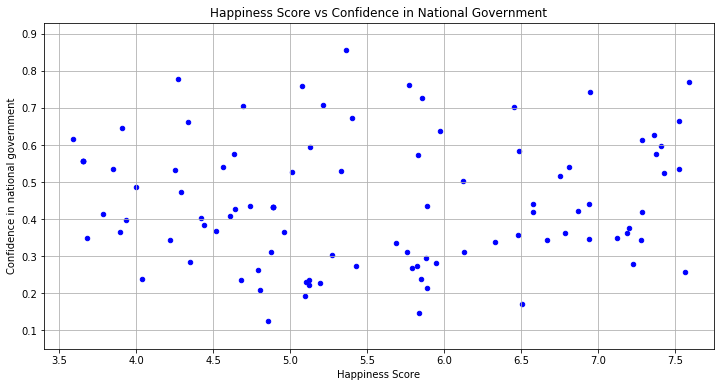

In [48]:
# Plotting Happiness Score vs Confidence in National Government:

small_plot1 = smaller_df.plot(kind="scatter",
                x="Happiness Score",
                y="Confidence in national government",
                color="blue",
                figsize=(12,6),
                grid=True,
                title="Happiness Score vs Confidence in National Government",
                xlim=(3.4,7.75),
                ylim=(0.05,.93),
                legend=True)
sfig =small_plot1.get_figure()
sfig.savefig("Images/HappinessScoreVsConfidenceinNationalGovernment.png")

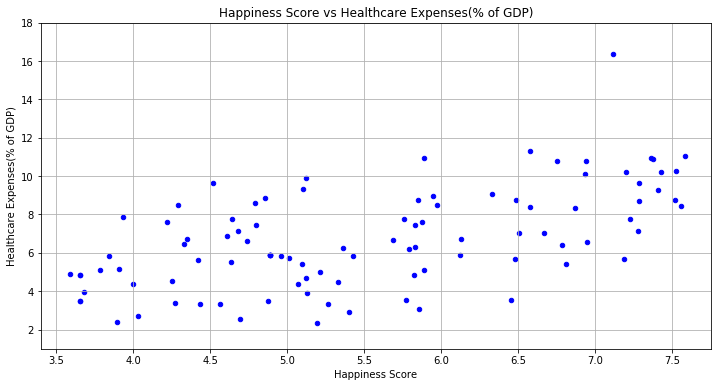

In [49]:
# Plotting Happiness Score vs Healthcare Expenses(% of GDP):

small_plot2 = smaller_df.plot(kind="scatter",
                x="Happiness Score",
                y="Healthcare Expenses(% of GDP)",
                color="blue",
                figsize=(12,6),
                grid=True,
                title="Happiness Score vs Healthcare Expenses(% of GDP)",
                xlim=(3.4,7.75),
                ylim=(1,18),
                legend=True)
sfig =small_plot2.get_figure()
sfig.savefig("Images/HappinessScoreVsHealthcareSpending.png")

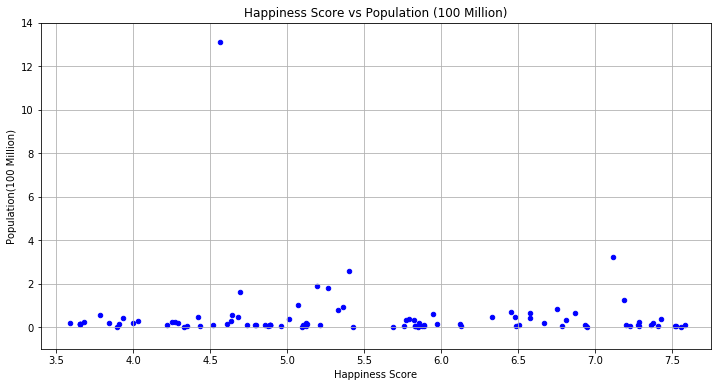

In [50]:
# Plotting Happiness Score vs Population (100 Million):

small_plot3 = smaller_df.plot(kind="scatter",
                x="Happiness Score",
                y="Population(100 Million)",
                color="blue",
                figsize=(12,6),
                grid=True,
                title="Happiness Score vs Population (100 Million)",
                xlim=(3.4,7.75),
                ylim=(-1,14),
                legend=True)
sfig =small_plot3.get_figure()
sfig.savefig("Images/HappinessScoreVsPopulation.png")

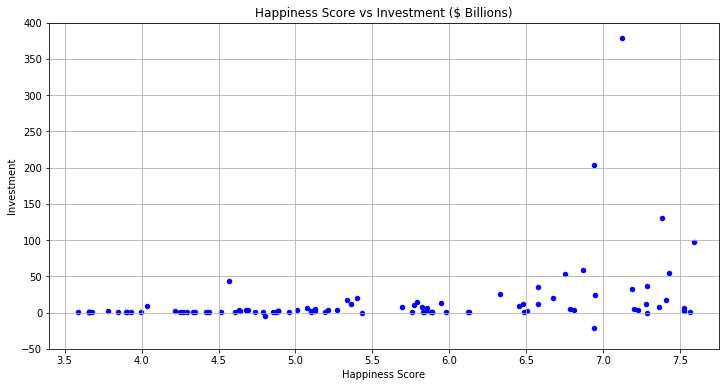

In [51]:
# Plotting Happiness Score vs Investment:

small_plot4 = smaller_df.plot(kind="scatter",
                x="Happiness Score",
                y="Investment",
                color="blue",
                figsize=(12,6),
                grid=True,
                title="Happiness Score vs Investment ($ Billions)",
                xlim=(3.4,7.75),
                ylim=(-50,400),
                legend=True)
sfig =small_plot4.get_figure()
sfig.savefig("Images/HappinessScoreVsInvestment.png")

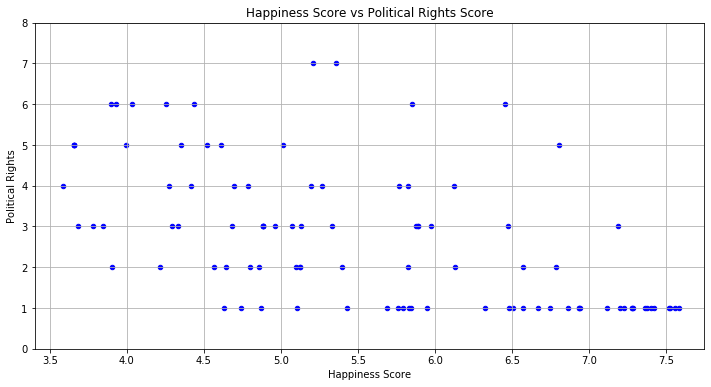

In [52]:
# Plotting Happiness Score vs Political Rights Score:

small_plot5 = smaller_df.plot(kind="scatter",
                x="Happiness Score",
                y="Political Rights",
                color="blue",
                figsize=(12,6),
                grid=True,
                title="Happiness Score vs Political Rights Score",
                xlim=(3.4,7.75),
                ylim=(0,8),
                legend=True)
sfig =small_plot5.get_figure()
sfig.savefig("Images/HappinessScoreVsPoliticalRights.png")

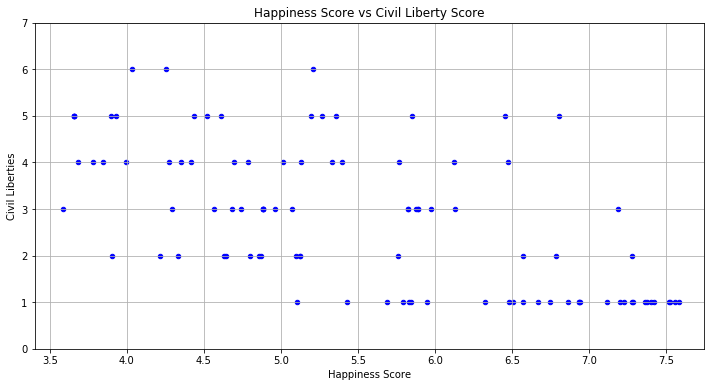

In [53]:
# Plotting Happiness Score vs Civil Liberty Score:

small_plot6 = smaller_df.plot(kind="scatter",
                x="Happiness Score",
                y="Civil Liberties",
                color="blue",
                figsize=(12,6),
                grid=True,
                title="Happiness Score vs Civil Liberty Score",
                xlim=(3.4,7.75),
                ylim=(0,7),
                legend=True)
sfig =small_plot6.get_figure()
sfig.savefig("Images/HappinessScoreVsCivilLibertyScore.png")

# Arjun's plots with bigger Data Frame:

In [60]:
# Plotting Happiness Score vs Confidence in National Government:

# big_plot1 = bigger_df.plot(kind="scatter",
#                 x="Happiness Score",
#                 y="Confidence in national government",
#                 color="blue",
#                 figsize=(12,6),
#                 grid=True,
#                 title="Happiness Score vs Confidence in National Government",
#                 xlim=(3.4,7.75),
#                 ylim=(0.05,.93),
#                 legend=True)

# bfig =big_plot1.get_figure()
# bfig.savefig("Images/HappinessScorevsConfidenceinNationalGovernment.png")

# Plotting Happiness Score vs Healthcare Expenses(% of GDP):

# big_plot2 = bigger_df.plot(kind="scatter",
#                 x="Happiness Score",
#                 y="Healthcare Expenses(% of GDP)",
#                 color="blue",
#                 figsize=(12,6),
#                 grid=True,
#                 title="Happiness Score vs Healthcare Expenses(% of GDP)",
#                 xlim=(3.4,7.75),
#                 ylim=(1,18),
#                 legend=True)
# bfig =big_plot2.get_figure()
# bfig.savefig("Images/Happiness Score vs Confidence in National Government.png")

# Plotting Happiness Score vs Population:

# big_plot3 = bigger_df.plot(kind="scatter",
#                 x="Happiness Score",
#                 y="Population(100 Million)",
#                 color="blue",
#                 figsize=(12,6),
#                 grid=True,
#                 title="Happiness Score vs Population (100 Million)",
#                 xlim=(3.4,7.75),
#                 ylim=(-1,14),
#                 legend=True)
# bfig =big_plot3.get_figure()
# bfig.savefig("Images/HappinessScoreVsPopulation.png")

# Plotting Happiness Score vs Investment ($ Billions):

# big_plot4 = bigger_df.plot(kind="scatter",
#                 x="Happiness Score",
#                 y="Investment",
#                 color="blue",
#                 figsize=(12,6),
#                 grid=True,
#                 title="Happiness Score vs Investment ($ Billions)",
#                 xlim=(3.4,7.75),
#                 ylim=(1,18),
#                 legend=True)
# bfig =big_plot4.get_figure()
# bfig.savefig("Images/HappinessScoreVsInvestment.png")

# Plotting Happiness Score vs Political Rights Score:

# big_plot5 = bigger_df.plot(kind="scatter",
#                 x="Happiness Score",
#                 y="Political Rights",
#                 color="blue",
#                 figsize=(12,6),
#                 grid=True,
#                 title="Happiness Score vs Political Rights Score",
#                 xlim=(3.4,7.75),
#                 ylim=(0,8),
#                 legend=True)
# bfig =big_plot5.get_figure()
# bfig.savefig("Images/HappinessScoreVsPoliticalRights.png")

# Plotting Happiness Score vs Civil Liberty Score:

# big_plot6 = bigger_df.plot(kind="scatter",
#                 x="Happiness Score",
#                 y="Civil Liberties",
#                 color="blue",
#                 figsize=(12,6),
#                 grid=True,
#                 title="Happiness Score vs Civil Liberty Score",
#                 xlim=(3.4,7.75),
#                 ylim=(0,8),
#                 legend=True)
# bfig =big_plot6.get_figure()
# bfig.savefig("Images/HappinessScoreVsCivilLibertyScore.png")

# Dakota's plots with Smaller Data Frame:

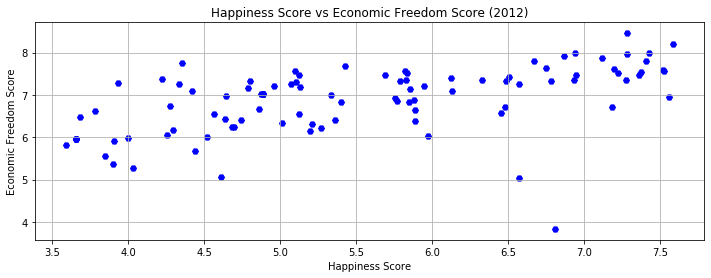

In [54]:
#Plot Economic Freedom Score vs Happiness Score
x_axis = smaller_df['Happiness Score']
y_axis = smaller_df['Economic Freedom Score']
plt.figure(figsize=(12,4))
plt.grid(True)
plt.scatter(x_axis, y_axis, marker="H", color ="blue")

#Set labels
plt.title(f"Happiness Score vs Economic Freedom Score (2012)")
plt.xlabel("Happiness Score")
plt.ylabel("Economic Freedom Score")

#save image
plt.savefig("Images/EFSvsHap.png")

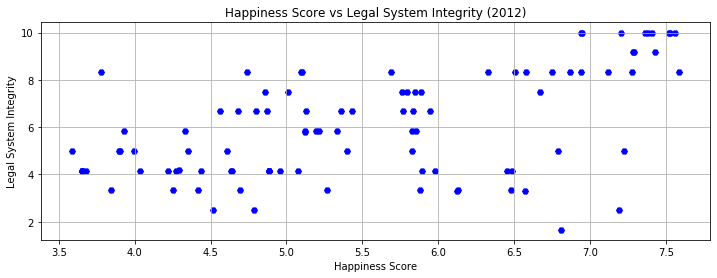

In [55]:
# Plot Legal System Integrity vs Happiness Score
x_axis = smaller_df['Happiness Score']
y_axis = smaller_df['Legal System Integrity']
plt.figure(figsize=(12,4))
plt.grid(True)
plt.scatter(x_axis, y_axis, marker="H", color ="blue")

#Set labels
plt.title(f"Happiness Score vs Legal System Integrity (2012)")
plt.xlabel("Happiness Score")
plt.ylabel("Legal System Integrity")

#save image
plt.savefig("Images/LegalIntvsHap.png")

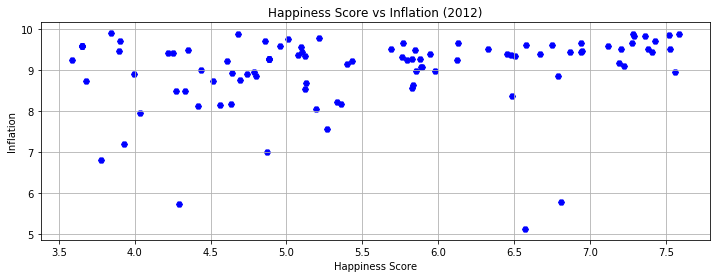

In [56]:
# Plot Inflation vs Happiness Score
x_axis = smaller_df['Happiness Score']
y_axis = smaller_df['Inflation']
plt.figure(figsize=(12,4))
plt.grid(True)
plt.scatter(x_axis, y_axis, marker="H", color ="blue")

#Set labels
plt.title(f"Happiness Score vs Inflation (2012)")
plt.xlabel("Happiness Score")
plt.ylabel("Inflation")

#save image
plt.savefig("Images/InflationvsHap.png")

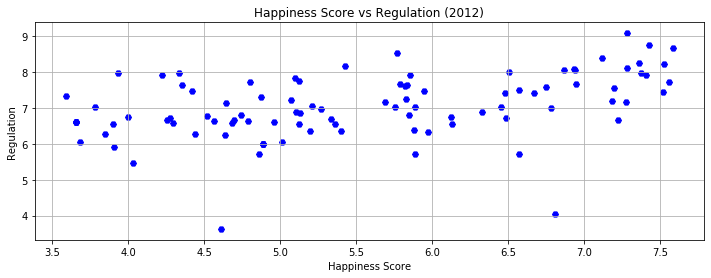

In [57]:
# Plot Regulation vs Happiness Score
x_axis = smaller_df['Happiness Score']
y_axis = smaller_df['Regulation']
plt.figure(figsize=(12,4))
plt.grid(True)
plt.scatter(x_axis, y_axis, marker="H", color ="blue")

#Set labels
plt.title(f"Happiness Score vs Regulation (2012)")
plt.xlabel("Happiness Score")
plt.ylabel("Regulation")

#save image
plt.savefig("Images/RegulationvsHap.png")

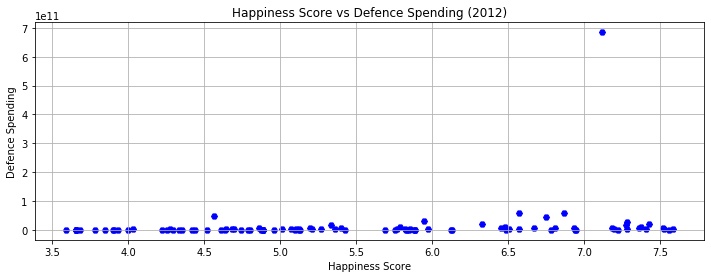

In [58]:
# Plot Defence Spending vs Happiness Score
x_axis = smaller_df['Happiness Score']
y_axis = smaller_df['Defence Spending']
plt.figure(figsize=(12,4))
plt.grid(True)
plt.scatter(x_axis, y_axis, marker="H", color ="blue")

#Set labels
plt.title(f"Happiness Score vs Defence Spending (2012)")
plt.xlabel("Happiness Score")
plt.ylabel("Defence Spending")

#save image
plt.savefig("Images/DefSpendvsHap.png")

# Dakota's plots with bigger DataFrame:

In [59]:
# # Plots for larger Data set, uncomment code to overwrite pngs
# #Plot Economic Freedom Score vs Happiness Score
# x_axis = bigger_df['Happiness Score']
# y_axis = bigger_df['Economic Freedom Score']
# plt.figure(figsize=(12,4))
# plt.grid(True)
# plt.scatter(x_axis, y_axis, marker="H", color ="blue")

# #Set labels
# plt.title(f"Happiness Score vs Economic Freedom Score (2012)")
# plt.xlabel("Happiness Score")
# plt.ylabel("Economic Freedom Score")

# #save image
# #plt.savefig("Images/EFSvsHap.png")

# # Plot Legal System Integrity vs Happiness Score
# x_axis = bigger_df['Happiness Score']
# y_axis = bigger_df['Legal System Integrity']
# plt.figure(figsize=(12,4))
# plt.grid(True)
# plt.scatter(x_axis, y_axis, marker="H", color ="blue")

# #Set labels
# plt.title(f"Happiness Score vs Legal System Integrity (2012)")
# plt.xlabel("Happiness Score")
# plt.ylabel("Legal System Integrity")

# #save image Uncomment code
# #plt.savefig("Images/LegalIntvsHap.png")

# # Plot Inflation vs Happiness Score
# x_axis = bigger_df['Happiness Score']
# y_axis = bigger_df['Inflation']
# plt.figure(figsize=(12,4))
# plt.grid(True)
# plt.scatter(x_axis, y_axis, marker="H", color ="blue")

# #Set labels
# plt.title(f"Happiness Score vs Inflation (2012)")
# plt.xlabel("Happiness Score")
# plt.ylabel("Inflation")

# #save image Uncomment to overwrite code
# #plt.savefig("Images/InflationvsHap.png")

# # Plot Regulation vs Happiness Score
# x_axis = bigger_df['Happiness Score']
# y_axis = bigger_df['Regulation']
# plt.figure(figsize=(12,4))
# plt.grid(True)
# plt.scatter(x_axis, y_axis, marker="H", color ="blue")

# #Set labels
# plt.title(f"Happiness Score vs Regulation (2012)")
# plt.xlabel("Happiness Score")
# plt.ylabel("Regulation")

# #save image Uncomment to overwrite png
# #plt.savefig("Images/RegulationvsHap.png")

# # Plot Defence Spending vs Happiness Score
# x_axis = bigger_df['Happiness Score']
# y_axis = bigger_df['Defence Spending']
# plt.figure(figsize=(12,4))
# plt.grid(True)
# plt.scatter(x_axis, y_axis, marker="H", color ="blue")

# #Set labels
# plt.title(f"Happiness Score vs Defence Spending (2012)")
# plt.xlabel("Happiness Score")
# plt.ylabel("Defence Spending")

# #save image Uncomment code to overwrite png
# #plt.savefig("Images/DefSpendvsHap.png")